In [120]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

In [101]:
TRAIN_RATIO = 0.6
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

X_train = np.reshape(X_train, (-1, 784)).astype('float32')
X_test = np.reshape(X_test, (-1, 784)).astype('float32')
X_val = np.reshape(X_val, (-1, 784)).astype('float32')

In [102]:
temp = []
temp2 = []
temp3 = []

for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

for i in range(len(y_test)):    
    temp2.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp2)

for i in range(len(y_val)):    
    temp3.append(to_categorical(y_val[i], num_classes=10))
y_val = np.array(temp3)

#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=100, epochs=25, validation_data=(X_test,y_test))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_57 (Dense)             (None, 24)                3096      
_________________________________________________________________
dropout_13 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 24)                96        
_________________________________________________________________
dense_58 (Dense)             (None, 24)              

In [103]:
#Evaluating digit MNIST test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)

print('test accuracy = ', test_acc)

438/438 [==============================] - 1s 2ms/step - loss: 0.1105 - acc: 0.9714
test accuracy =  0.9714285731315613


In [104]:
#Predicting the labels
y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_eval = np.argmax(y_test, axis=1)

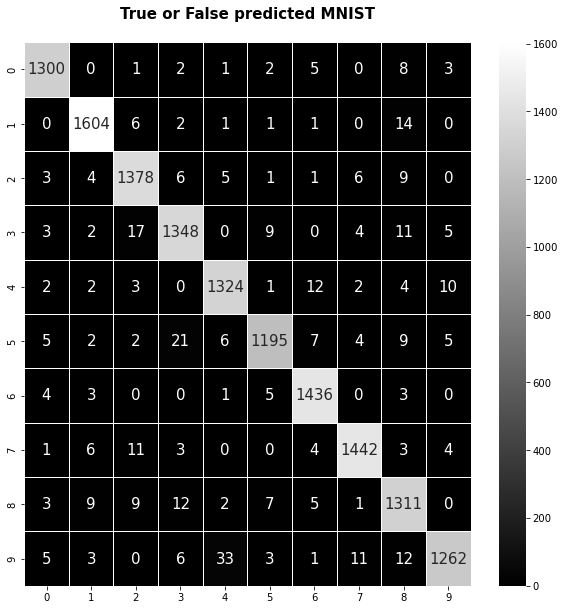

In [105]:
#Confusion matrix for Digit MNIST
con_mat = confusion_matrix(y_test_eval, y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [106]:
#Predicting the labels for validation
y_predict2 = model.predict(X_val)
y_predict2 = np.argmax(y_predict2, axis=1)
y_val_eval = np.argmax(y_val, axis=1)

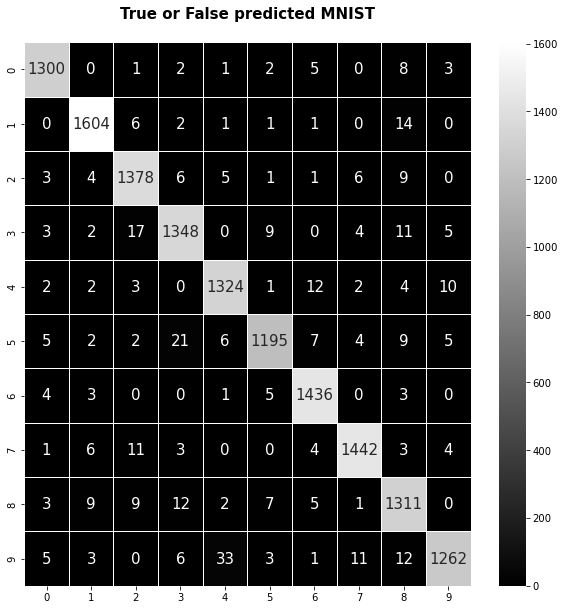

In [107]:
#Confusion matrix for Digit MNIST - validation
con_mat2 = confusion_matrix(y_val_eval, y_predict2)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [108]:
con_mat_df = pd.DataFrame(confusion_matrix(y_val_eval, y_predict))
parameters = pd.DataFrame(model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_57 (Dense)             (None, 24)                3096      
_________________________________________________________________
dropout_13 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 24)                96        
_________________________________________________________________
dense_58 (Dense)             (None, 24)              

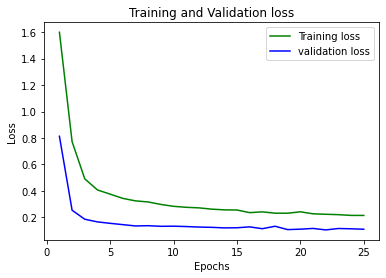

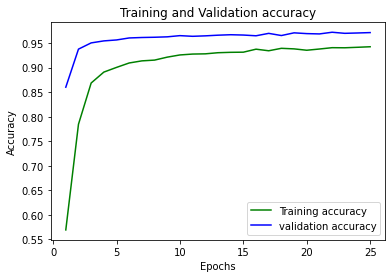

In [118]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [128]:
outname = 'confusionMat_ANN.csv'

outdir = 'EXPORTS'
if not os.path.exists(outdir):
    os.mkdir(outdir)
    
con_mat_df.to_csv(f"{outdir}/{outname}")

#save model
path = "C:\\Users\\maika\\470_WORK\\ANN_model.csv"
model.save(path)

INFO:tensorflow:Assets written to: C:\Users\maika\470_WORK\ANN_model.csv\assets
